# Работа с таблицами в pandas

## Вступление

В машинном обучении, как правило, всё сводится к анализу табличных данных. Начинать мы можем с большого количества сложных таблиц, изображений, текстов или ещё чего-то непростого, но в итоге всё это обычно сводится к одной таблице, где каждый объект описывается набором признаков. Поэтому важно уметь работать с таблицами.

А ещё есть некоторые исследования, показывающие, что в решении задачи интеллектуального анализа данных обычно 20% времени уходит на построение моделей и прочую интересную работу, связанную с тем, что рассказывается у нас на лекциях, а 80% времени специалисты тратят на подготовку и обработку данных. Сюда входит формирование признаков, устранение выбросов и пропусков и т.д. И это тоже, по сути дела, манипуляции с таблицами.

Вывод: важно уметь работать с табличными данными. В Python для этого есть библиотека pandas, которую мы и будем сегодня изучать. Это самый популярный инструмент для работы с данными. Цель семинара — познакомить вас с основными конструкциями pandas и научить им пользоваться.

Почему pandas удобный?

1.	Удобное представление таблиц и куча готовых методов, как работать с этими таблицами
2.	Простота использования
3.	Наличие встроенных визуализаций
4.	Наличие всех функций из excel (и даже больше)
5.	Универсальность инструмента, можно читать почти все табличные типы данных
6.	Хорошо подходит для экспериментов с данными

А почему он неудобный?


1.	Медленный
2.	Чаще всего нельзя использовать в проде из-за скорости
3.	Иногда сложно интерпретировать код, написанный на pandas

### План семинара
1. Работаем с датасетом оценок студентов
2. Работаем с датасетом пассажиров Титаника

### Дополнительные материалы

[Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

[10 Minutes To Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)

[Pandas CookBook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)



Чаще всего название библиотеки при импорте сокращают до "pd":

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Работаем с датасетом оценок студентов

Pandas предоставляет нам много различных инструментов работы с табличными данными. Главные из них — это: класс таблицы `pandas.core.frame.DataFrame` и его методы; класс серии данных (например, столбец таблицы) `pandas.core.series.Series` и его методы; и различные функции библиотеки. 

Начнём с подгрузки таблицы из файла и посмотрим на методы класса `DataFrame`.

In [2]:
df = pd.read_csv("grades.csv", sep=",", index_col=0)
type(df)

pandas.core.frame.DataFrame

In [3]:
# размер таблицы
df.shape

(38, 10)

In [4]:
# вывести начало таблицы
df.head(5)

,hash,0,1,2,3,4,5,6,7,8
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# вывести конец таблицы
df.tail()

,hash,0,1,2,3,4,5,6,7,8
33,c11c124eb9,0.0,1.0,1.0,0.8,0.5,0.5,0.0,0.0,0.7
34,8b4c1af94b,0.8,1.0,1.0,1.0,0.5,0.0,0.5,0.0,0.7
35,e1388f2aae,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,ee55242421,0.8,1.0,0.0,0.7,0.0,1.0,0.0,0.9,0.0
37,d6c40a7f4b,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# выбрать случайные строки
df.sample(n=5)

,hash,0,1,2,3,4,5,6,7,8
12,b5c2ae4623,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.6
33,c11c124eb9,0.0,1.0,1.0,0.8,0.5,0.5,0.0,0.0,0.7
29,80a4f796b4,0.5,0.2,1.0,1.0,0.5,0.2,0.5,0.0,0.2
19,789d9f4f97,0.0,1.0,0.8,1.0,0.0,0.0,0.5,0.0,0.0
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0


In [7]:
# выбрать случайные строки 2
df.sample(frac=0.3)

,hash,0,1,2,3,4,5,6,7,8
10,f9f854aa44,1.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
14,a2d96fe1d4,0.0,0.7,1.0,1.0,0.0,0.0,0.0,0.0,0.0
34,8b4c1af94b,0.8,1.0,1.0,1.0,0.5,0.0,0.5,0.0,0.7
32,e342391d26,0.0,0.8,0.0,0.7,0.5,0.0,0.0,0.0,0.0
26,d7955cb7bc,0.0,0.7,1.0,1.0,0.0,0.5,0.0,0.0,0.0
5,7ca01c996f,0.5,0.8,0.5,0.5,0.0,0.0,0.0,0.0,0.0
35,e1388f2aae,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Параметр frac в методе sample() библиотеки pandas определяет долю (процент) строк, которые должны быть случайным образом выбраны из DataFrame. Он указывает, какую часть данных нужно выбрать случайным образом. Значение frac=0.3 означает, что будут выбраны 30% строк из исходного DataFrame.


Добавим работу со столбцами:

датафрейм можно индексировать квадратными скобками с названиями столбцов. Столбец будет экземпляром класса `pandas.core.series.Series`.

In [8]:
df.columns

Index(['hash', '0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

In [9]:
col0 = df["0"]
col0

0     0.8
1     0.2
2     0.8
3     0.0
4     0.0
5     0.5
6     0.9
7     0.8
8     0.0
9     0.8
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.2
16    0.2
17    0.8
18    0.0
19    0.0
20    0.0
21    0.8
22    0.8
23    0.8
24    0.8
25    0.8
26    0.0
27    0.0
28    0.8
29    0.5
30    0.8
31    0.8
32    0.0
33    0.0
34    0.8
35    0.0
36    0.8
37    0.0
Name: 0, dtype: float64

In [10]:
type(col0)

pandas.core.series.Series

In [11]:
# выбрать 5 строк с наибольшими значениями в столбцах '3', '4'
df.nlargest(n=5, columns=["3", "4"])

,hash,0,1,2,3,4,5,6,7,8
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
15,7174532c74,0.2,0.9,1.0,1.0,1.0,0.0,0.0,0.0,0.0
20,6588f97aea,0.0,0.6,1.0,1.0,1.0,0.5,0.0,0.0,0.7
6,2a5a018502,0.9,1.0,1.0,1.0,0.8,0.0,0.5,0.0,0.7


In [12]:
# подсчитать количество уникальных значений в столбце 3
df["3"].nunique()

7

In [13]:
# подсчитать, сколько раз встретилось в столбце '3' каждое уникальное значение
df["3"].value_counts()

3
1.0    20
0.0     8
0.7     4
0.5     3
0.9     1
0.2     1
0.8     1
Name: count, dtype: int64

Доступ к столбцу можно получить не только через квадратные скобки, но и через точку, по аналогии с атрибутом класса.

In [14]:
df["hash"]

0     cbe32a2a1b
1     caa93590ad
2     5bbe47f96d
3     3f187965b9
4     bf1e56e185
5     7ca01c996f
6     2a5a018502
7     99fe117fcb
8     6875ba52f0
9     1eea619f12
10    f9f854aa44
11    6346ddfdb5
12    b5c2ae4623
13    15360bcc4c
14    a2d96fe1d4
15    7174532c74
16    426dfedb85
17    bae2523189
18    5a0a06b184
19    789d9f4f97
20    6588f97aea
21    b7235befa9
22    ca49cc7265
23    6134e7ea6f
24    8f67295cb3
25    cb9dfc5d66
26    d7955cb7bc
27    237fe82b6f
28    b8132ed8db
29    80a4f796b4
30    403978747a
31    33979cb9cb
32    e342391d26
33    c11c124eb9
34    8b4c1af94b
35    e1388f2aae
36    ee55242421
37    d6c40a7f4b
Name: hash, dtype: object

In [15]:
df.hash

0     cbe32a2a1b
1     caa93590ad
2     5bbe47f96d
3     3f187965b9
4     bf1e56e185
5     7ca01c996f
6     2a5a018502
7     99fe117fcb
8     6875ba52f0
9     1eea619f12
10    f9f854aa44
11    6346ddfdb5
12    b5c2ae4623
13    15360bcc4c
14    a2d96fe1d4
15    7174532c74
16    426dfedb85
17    bae2523189
18    5a0a06b184
19    789d9f4f97
20    6588f97aea
21    b7235befa9
22    ca49cc7265
23    6134e7ea6f
24    8f67295cb3
25    cb9dfc5d66
26    d7955cb7bc
27    237fe82b6f
28    b8132ed8db
29    80a4f796b4
30    403978747a
31    33979cb9cb
32    e342391d26
33    c11c124eb9
34    8b4c1af94b
35    e1388f2aae
36    ee55242421
37    d6c40a7f4b
Name: hash, dtype: object

Однако, важно помнить, что доступ через точку имеет некоторые ограничения:

Имя столбца не должно содержать пробелов или специальных символов.
Имя столбца не должно совпадать с методом pandas (например, df.index или df.columns).
Поэтому квадратные скобки — более универсальный и безопасный способ.

А вот доступ к строкам можно получить при помощи `.iloc` и `loc`. 

Внешне они выглядят одинаково, но отличаются в деталях: первый индексирует по номеру строки, а второй — по индексирующему столбцу. Мы вернёмся к этому ниже, когда будет говорить про данные пассажиров Титаника. Обратите внимание, что такая индексация возвращает новый объект класса `DataFrame`.

In [16]:
df.iloc[:5]

,hash,0,1,2,3,4,5,6,7,8
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
temp = df.loc[:5]
type(temp)

pandas.core.frame.DataFrame

In [18]:
# склеить две таблицы по строкам
df1 = df.iloc[:5]
df2 = df.iloc[10:15]
pd.concat([df1, df2])

,hash,0,1,2,3,4,5,6,7,8
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,f9f854aa44,1.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
11,6346ddfdb5,0.0,1.0,1.0,0.0,0.5,0.0,0.5,0.0,0.7
12,b5c2ae4623,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.6
13,15360bcc4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,a2d96fe1d4,0.0,0.7,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# склеить две таблицы по столбцам
df1 = df[["hash", "1"]]
df2 = df[["3", "4"]]
pd.concat([df1, df2], axis=1).head()

,hash,1,3,4
0,cbe32a2a1b,1.0,1.0,1.0
1,caa93590ad,0.2,0.7,0.0
2,5bbe47f96d,1.0,1.0,1.0
3,3f187965b9,0.0,1.0,0.5
4,bf1e56e185,0.0,0.0,0.0


Метод `DataFrame.merge` объединяет таблицы по переданному столбцу (аналог SQL: JOIN).

In [20]:
# таблица с оценками
df_grades = pd.read_csv("grades.csv", index_col=0)
df_grades.head()

,hash,0,1,2,3,4,5,6,7,8
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_hashes = pd.read_csv("hashes.csv")
df_hashes.head()

,Группа,Фамилия,Имя,Отчество,hash
0,БПМ-161,Антонов,Алексей,Алексеевич,6875ba52f0
1,БПМ-161,Арсамакова,Алина,Ибрагимовна,7ca01c996f
2,БПМ-161,Богатов,Антон,Юрьевич,15360bcc4c
3,БПМ-161,Бычков,Андрей,-,f9f854aa44
4,БПМ-161,Высоцкий,Яков,Михайлович,1d1d05c257


Не для всех студентов известны оценки!

In [22]:
df_grades.hash.nunique(), df_hashes.hash.nunique()

(38, 95)

In [23]:
df_grades.columns

Index(['hash', '0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

В контексте объединения DataFrame (merge) параметр how="left" означает, что результат объединения будет содержать все строки из левого DataFrame (того, что указан первым) независимо от того, найдены ли соответствия в правом DataFrame. Если для строки из левого DataFrame не найдется совпадающая строка в правом DataFrame по ключу объединения, то столбцы, пришедшие из правого DataFrame, будут заполнены значениями NaN.

Например, если объединять df_hashes (левый) с df_grades (правый) по столбцу hash:


In [24]:
# присоединить подходящие строки из df_grades к df_hashes
df = pd.merge(df_hashes, df_grades, on="hash", how="left")
print(df.shape)
df.head(10)

(95, 14)


,Группа,Фамилия,Имя,Отчество,hash,0,1,2,3,4,5,6,7,8
0,БПМ-161,Антонов,Алексей,Алексеевич,6875ba52f0,0.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
1,БПМ-161,Арсамакова,Алина,Ибрагимовна,7ca01c996f,0.5,0.8,0.5,0.5,0.0,0.0,0.0,0.0,0.0
2,БПМ-161,Богатов,Антон,Юрьевич,15360bcc4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,БПМ-161,Бычков,Андрей,-,f9f854aa44,1.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
4,БПМ-161,Высоцкий,Яков,Михайлович,1d1d05c257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,БПМ-161,Галигеров,Владислав,Сергеевич,738b683ed7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,БПМ-161,Гончаров,Глеб,Игоревич,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
7,БПМ-161,Городилов,Илья,Игоревич,6df2f31eb9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,БПМ-161,Дудинов,Тимур,Батырович,e1388f2aae,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,БПМ-161,Иванов,Артём,Владиславович,a2d96fe1d4,0.0,0.7,1.0,1.0,0.0,0.0,0.0,0.0,0.0


Использование how="left" гарантирует, что итоговый DataFrame будет содержать все строки из df_hashes, даже если для некоторых из них не найдены данные из df_grades.
Результирующий DataFrame будет иметь число строк, равное количеству строк в df_hashes (в данном случае 95), а число столбцов – сумму столбцов из обоих DataFrame за вычетом повторяющегося столбца hash.
Таким образом, вывод df.shape покажет итоговые размеры объединённого DataFrame, а df.head(10) отобразит первые 10 строк, где можно увидеть, что для некоторых записей отсутствуют данные оценок (NaN).

Чтобы проверить, содержится ли конкретное значение хеша в столбце, можно воспользоваться несколькими способами. Вот два основных варианта:

Использовать оператор in с массивом значений:




In [25]:
'1d1d05c257' in df_hashes.hash.values

True

Здесь df_hashes.hash.isin(['1d1d05c257']) создаёт булеву серию, где True указывает на наличие значения, а метод .any() возвращает True, если хотя бы одно значение равно True.

Оба способа позволяют проверить наличие нужного хеша в столбце.

In [26]:
df_hashes.hash.isin(['1d1d05c257']).any()

np.True_

При использовании how="right" итоговый DataFrame содержит все строки из правого DataFrame (то есть из df_grades) независимо от того, найдены ли соответствующие строки в левом DataFrame (df_hashes).

- Каждая строка из df_grades остаётся.
- Если для конкретного hash из df_grades находится совпадение в df_hashes, к ней добавляются данные из df_hashes.
- Если совпадение отсутствует, данные из столбцов df_hashes будут заполнены значениями NaN.

Простой пример:

Допустим, в df_grades есть хэш abc123, а в df_hashes такой хэш отсутствует.
При объединении с how="right" строка с abc123 из df_grades попадёт в итоговый DataFrame, но столбцы из df_hashes будут равны NaN.

Однако у нас все студенты присутсвуют в df_hashes, поэтому NaN не будет

In [27]:
# присоединить подходящие строки из df_hashes к df_grades
df = pd.merge(df_hashes, df_grades, on="hash", how="right")
print(df.shape)
df.head(10)

(38, 14)


,Группа,Фамилия,Имя,Отчество,hash,0,1,2,3,4,5,6,7,8
0,БПМ-162,Сучков,Даниил,Викторович,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,БПМ-161,Хмельницкий,Даниил,Анатольевич,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
2,БПМ-162,Углов,Егор,Алексеевич,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
3,БПМ-161,Гончаров,Глеб,Игоревич,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
4,БПМ-161,Мартынов,Никита,Игоревич,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,БПМ-161,Арсамакова,Алина,Ибрагимовна,7ca01c996f,0.5,0.8,0.5,0.5,0.0,0.0,0.0,0.0,0.0
6,БПМ-162,Островский,Всеволод,Петрович,2a5a018502,0.9,1.0,1.0,1.0,0.8,0.0,0.5,0.0,0.7
7,БПМ-162,Борисычев,Александр,Сергеевич,99fe117fcb,0.8,0.0,1.0,0.9,1.0,1.0,0.5,0.0,0.0
8,БПМ-161,Антонов,Алексей,Алексеевич,6875ba52f0,0.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
9,БПМ-162,Лисицына,Анастасия,Сергеевна,1eea619f12,0.8,1.0,0.0,0.2,0.5,0.2,0.0,0.0,0.2



При использовании how="inner" итоговый DataFrame содержит только те строки, у которых найдено совпадение по ключу (в нашем случае по столбцу hash) в обоих DataFrame.

Что происходит:

Из обеих таблиц остаются только те строки, где значение hash присутствует и в df_hashes, и в df_grades.
Если для какого-то hash не найдено совпадение хотя бы в одной из таблиц, эта строка вообще не попадает в итоговый DataFrame.


Если df_grades содержит 38 уникальных хэшей, а df_hashes – 95, и все хэши из df_grades есть в df_hashes, то итоговое объединение (inner join) будет содержать ровно 38 строк, то есть только те, что есть в правом DataFrame.


In [28]:
# пересечение таблиц
# в данном случае эквивалентно 'right', т.к. в df_grades нет таких хэшей, которые отсутствуют в df_hashes
df = pd.merge(df_hashes, df_grades, on="hash", how="inner")
print(df.shape)
df.head(10)

(38, 14)


,Группа,Фамилия,Имя,Отчество,hash,0,1,2,3,4,5,6,7,8
0,БПМ-161,Антонов,Алексей,Алексеевич,6875ba52f0,0.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
1,БПМ-161,Арсамакова,Алина,Ибрагимовна,7ca01c996f,0.5,0.8,0.5,0.5,0.0,0.0,0.0,0.0,0.0
2,БПМ-161,Богатов,Антон,Юрьевич,15360bcc4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,БПМ-161,Бычков,Андрей,-,f9f854aa44,1.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
4,БПМ-161,Гончаров,Глеб,Игоревич,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
5,БПМ-161,Дудинов,Тимур,Батырович,e1388f2aae,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,БПМ-161,Иванов,Артём,Владиславович,a2d96fe1d4,0.0,0.7,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,БПМ-161,Кубышкина,Екатерина,Константиновна,6588f97aea,0.0,0.6,1.0,1.0,1.0,0.5,0.0,0.0,0.7
8,БПМ-161,Мартынов,Никита,Игоревич,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,БПМ-161,Плешко,Георгий,Дмитриевич,5a0a06b184,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0



При использовании how="outer" итоговый DataFrame представляет собой объединение (union) всех строк из обоих DataFrame.

Что происходит:

В итоговый DataFrame попадут все строки как из df_hashes, так и из df_grades.
Если для определённого hash найдено совпадение, данные объединяются.
Если совпадение отсутствует, отсутствующие столбцы заполняются значениями NaN.



Если в df_hashes есть строки с хэшами, которых нет в df_grades, и наоборот, то итоговый DataFrame будет содержать все уникальные хэши из обеих таблиц.
В данном случае, как отмечено, outer join окажется эквивалентным left join, поскольку в df_grades нет хэшей, отсутствующих в df_hashes.

In [29]:
# объединение таблиц
# в данном случае эквивалентно 'left', т.к. в df_grades нет таких хэшей, которые отсутствуют в df_hashes
df = pd.merge(df_hashes, df_grades, on="hash", how="outer")
print(df.shape)
df.head(10)

(95, 14)


,Группа,Фамилия,Имя,Отчество,hash,0,1,2,3,4,5,6,7,8
0,БПМ-163,Румянцева,Екатерина,Александровна,021751395a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,БПМ-163,Балашов,В,В,0a9d4d6207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,БПМ-162,Сергачев,Андрей,Дмитриевич,10e36024c4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,БПМ-161,Синицын,Александр,Юрьевич,1279af2d6f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,БПМ-163,Ефремов,Андрей,Александрович,12a03228b1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,БПМ-161,Богатов,Антон,Юрьевич,15360bcc4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,БПМ-161,Соколов,Александр,Николаевич,165aac7dac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,БПМ-161,Высоцкий,Яков,Михайлович,1d1d05c257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,БПМ-162,Загороднев,Денис,Григорьевич,1e6b966bf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,БПМ-162,Лисицына,Анастасия,Сергеевна,1eea619f12,0.8,1.0,0.0,0.2,0.5,0.2,0.0,0.0,0.2


In [30]:
# выбрать из таблицы хэшей только те строки, в которых хэш есть в таблице оценок
# т.е. отобрать тех студентов, которые писали контрольную и были оценены
df = df_hashes[df_hashes.hash.isin(df_grades.hash)]
print(df.shape)
df.head()

(38, 5)


,Группа,Фамилия,Имя,Отчество,hash
0,БПМ-161,Антонов,Алексей,Алексеевич,6875ba52f0
1,БПМ-161,Арсамакова,Алина,Ибрагимовна,7ca01c996f
2,БПМ-161,Богатов,Антон,Юрьевич,15360bcc4c
3,БПМ-161,Бычков,Андрей,-,f9f854aa44
6,БПМ-161,Гончаров,Глеб,Игоревич,3f187965b9


1. df_hashes.hash.isin(df_grades.hash):
 
   Здесь для каждого значения столбца `hash` в DataFrame `df_hashes` проверяется, содержится ли оно в столбце `hash` DataFrame `df_grades`.  
   - Функция `isin()` возвращает булеву серию (Series) с теми же индексами, где для каждого элемента будет `True`, если значение найдено в `df_grades.hash`, и `False` если нет.

3. Фильтрация DataFrame 
   Выражение `df_hashes[...]` использует эту булеву серию для фильтрации строк. То есть в итоговый DataFrame попадут только те строки из `df_hashes`, для которых условие `True` — это те, где хэш присутствует и в `df_grades`.

Фильтруются только те студенты, которые, судя по хэшам, принимали участие в контрольной и были оценены. Строки, где студент отсутствует в оценках, исключаются.

Таким образом, этот код помогает отобрать студентов из таблицы `df_hashes`, которые действительно сдавали контрольную и получили оценку, основываясь на наличии их хэша в таблице оценок `df_grades`.

In [31]:
# сколько человек из каждой группы были оценены?
df.Группа.value_counts()

Группа
БПМ-161    18
БПМ-162    18
БПМ-163     2
Name: count, dtype: int64

In [32]:
type(df)

pandas.core.frame.DataFrame

In [33]:
type(df["Группа"])

pandas.core.series.Series

Метод `DataFrame.groupby` делает группировку строк по значениям в каком-то столбце, чтобы мы могли их усреднить/просуммировать/etc. Например, если бы у нас была таблица вида [студент - предмет - оценка], то мы могли бы сгруппировать строки по столбцу предмета и посчитать по каждому предмету среднюю оценку.

In [34]:
df_grades.columns

Index(['hash', '0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

In [35]:
df_grades

,hash,0,1,2,3,4,5,6,7,8
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7ca01c996f,0.5,0.8,0.5,0.5,0.0,0.0,0.0,0.0,0.0
6,2a5a018502,0.9,1.0,1.0,1.0,0.8,0.0,0.5,0.0,0.7
7,99fe117fcb,0.8,0.0,1.0,0.9,1.0,1.0,0.5,0.0,0.0
8,6875ba52f0,0.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
9,1eea619f12,0.8,1.0,0.0,0.2,0.5,0.2,0.0,0.0,0.2


## 2. Работаем с датасетом пассажиров Титаника

Каждая строчка наборов данных содержит следующие поля:

- Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

- Name — имя;

- Sex — пол;

- Age — возраст;

- SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту Титаника;

- Parch — количество родителей, детей (в том числе приемных) на борту Титаника;

- Ticket — номер билета;

- Fare — плата за проезд;

- Cabin — каюта;

- Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон)

- Survived - пассажир выжил или нет.

В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [36]:
df = pd.read_csv("titanic_train.csv", sep=",")

In [37]:
# типы данных
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [38]:
# сравним, сколько места занимает столбец
df["SibSp"].astype("int64").memory_usage()

7260

In [39]:
df["SibSp"].astype("int8").memory_usage()

1023

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для первичного анализа полезно посмотреть на базовые статистики численных переменных. Для этого есть готовый метод:

In [41]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [45]:
Y = df["Survived"]
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [46]:
df[["Survived", "Age"]].head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [47]:
# удаление данных одного из столбцов
X = df[df.columns.drop("Survived")]

In [48]:
X = df.drop("Survived", axis=1)  # same thing as previous cell

In [49]:
df.shape, X.shape, Y.shape

((891, 12), (891, 11), (891,))

Обещанная индексация! Давайте сперва проиндексируем таблицу двумя способами через `iloc` и `loc`, а затем изменим индексирующий столбец и посмотри на разницу.

In [50]:
X.iloc[[5, 8, 10]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [51]:
X.loc[[5, 8, 10]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [52]:
# Меняем индексацию!
df_new = df.set_index("Name")
df_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df_new.loc["Braund, Mr. Owen Harris"]

PassengerId            1
Survived               0
Pclass                 3
Sex                 male
Age                 22.0
SibSp                  1
Parch                  0
Ticket         A/5 21171
Fare                7.25
Cabin                NaN
Embarked               S
Name: Braund, Mr. Owen Harris, dtype: object

### Анализ данных

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
set(df["Sex"])

{'female', 'male'}

In [56]:
len(set(df["Name"]))

891

In [57]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

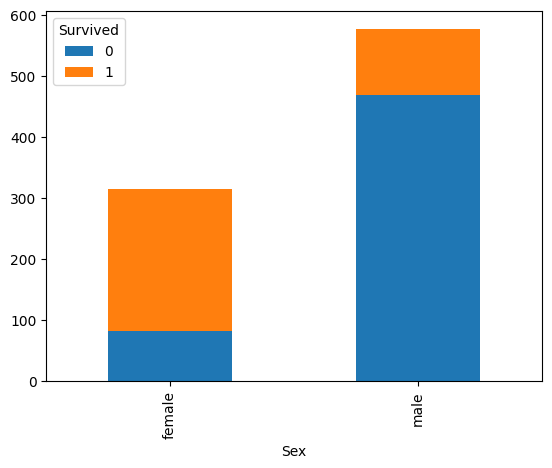

In [58]:
df.pivot_table("PassengerId", "Sex", "Survived", "count").plot(kind="bar", stacked=True);
# Какой вывод из полученных гистограмм?


1. **Создание сводной таблицы (pivot table):**  
   - **"PassengerId":** используется как значение для агрегации (считается количество пассажиров).  
   - **"Sex":** задаёт строки таблицы (по полу пассажиров).  
   - **"Survived":** задаёт столбцы таблицы (статус выживания: 0 – не выжил, 1 – выжил).  
   - **"count":** агрегирующая функция, которая считает количество записей для каждого сочетания пола и статуса выживания.

2. **Построение гистограммы:**  
   - Полученная сводная таблица визуализируется с помощью метода `.plot(kind="bar", stacked=True)`.  
   - В итоге получается столбчатая диаграмма, где для каждого пола (мужчины, женщины) столбец разделён на части: одна часть – количество пассажиров, не выживших, другая – выживших.  
   - Опция `stacked=True` накладывает значения друг на друга, показывая суммарное число пассажиров для каждой категории пола, а также их распределение по статусу выживания.

Таким образом, из полученных гистограмм можно сделать вывод о том, что пол пассажира был важным фактором, влияющим на шансы выживания на "Титанике": женщины выживали чаще, чем мужчины.

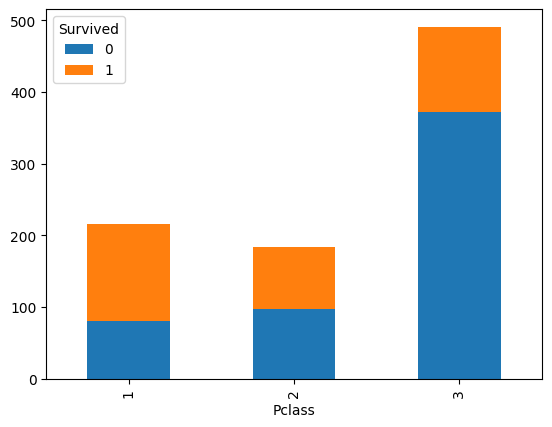

In [59]:
df.pivot_table("PassengerId", "Pclass", "Survived", "count").plot(
    kind="bar", stacked=True
);
# Какой вывод из полученных гистограмм?

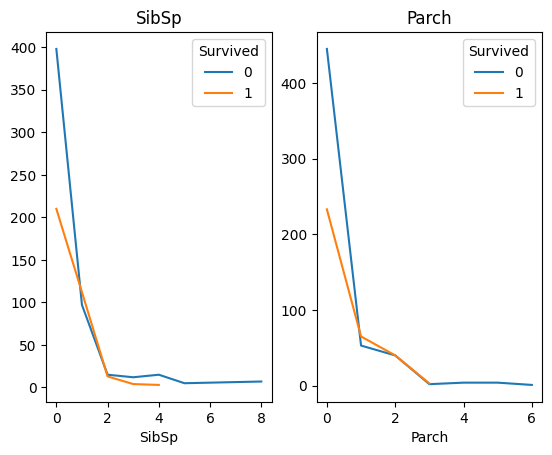

In [60]:
fig, axes = plt.subplots(ncols=2)
df.pivot_table("PassengerId", ["SibSp"], "Survived", "count").plot(
    ax=axes[0], title="SibSp"
)
df.pivot_table("PassengerId", ["Parch"], "Survived", "count").plot(
    ax=axes[1], title="Parch"
);

# Какой вывод из полученных графиков?

на оси X отложено количество родственников на борту (супруг/братья/сёстры — *SibSp* на левом графике, родители/дети — *Parch* на правом), а по оси Y — число пассажиров в каждой группе, разделённое на выживших и невыживших.

Вот несколько ключевых моментов:

1. **Большинство пассажиров путешествовало в одиночку (0 родных)**  
   - На обоих графиках (SibSp=0 и Parch=0) видим самый высокий столбец: это означает, что основной массив пассажиров не имел родственников на борту.  
   - Среди них абсолютное число невыживших выше, чем выживших (линия или сегмент для «Survived=0» выше, чем для «Survived=1»).

2. **Наличие небольшого числа родственников повышало шансы выжить**  
   - На графике SibSp при значении 1 иногда видно, что число выживших приближается к числу невыживших или даже может превышать его. Аналогичная картина может наблюдаться и для Parch=1.  
   - Это говорит о том, что пассажиры, путешествующие с 1–2 родственниками, зачастую имели *выше* шанс на спасение, чем те, кто плыл один.

3. **Большое количество родственников встречается редко**  
   - Для значений 3, 4, 5, 6, 8 (и SibSp, и Parch) столбики очень низкие — таких семей на борту было мало.  
   - Из-за малой выборки здесь сложно делать статистически надёжные выводы, но обычно большие семьи спасались хуже (либо не успевали эвакуироваться вместе, либо им было сложнее скоординироваться).

**Основной вывод**:  
- *Самая многочисленная группа* — пассажиры, плывшие без родственников. Среди них абсолютное число невыживших заметно выше.  
- *Наличие 1–2 родственников* (супруга, детей, родителей) могло повышать шансы на спасение (возможно, потому что люди помогали друг другу или им было проще получить место в шлюпке).  
- *Слишком большие семьи* встречались редко, и их шансы на выживание обычно были ниже (или выборка слишком мала, чтобы судить уверенно).

Таким образом, умеренное количество близких на борту коррелирует с более высокой выживаемостью, а полное одиночество или очень большая семья чаще приводили к печальному исходу.

### Обработка и преобразование данных

In [61]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


Преобразуем категориальный признак "Sex" в числовые значения, заменяя "male" на 1, "female" на -1, а "unknown" на 0. Результат сохраняется в новый столбец "DecodedSex", после чего df.head(2) выводит первые две строки обновленного DataFrame

In [62]:
# преобразуем текстовый признак "Пол" в числовые значения
df["DecodedSex"] = df["Sex"].map({"male": 1, "female": -1, "unknown": 0})
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-1


In [63]:
# добавим еще одну характеристику для каждого объекта датасета
def fun(age):
    return age / 100


df["NewAge"] = df["Age"].apply(fun)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-1,0.38


In [64]:
# то же самое можно сделать с помощью лямбда функции
df["NewAge"] = df["Age"].apply(lambda age: age / 100)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-1,0.38


Лямбда-функция — это небольшая анонимная (безымянная) функция, которую можно объявить прямо в коде без использования `def`. В данном случае `lambda age: age / 100` — это функция, которая принимает `age` и делит его на 100.  

Применяя `apply()`, мы используем эту функцию для каждого значения в столбце `"Age"` и сохраняем результат в новый столбец `"NewAge"`. Затем `df.head(2)` выводит первые две строки DataFrame.

In [65]:
df["NewAge"] = df["Age"] / 100
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-1,0.38


**Важно!** Pandas, как и NumPy, является лишь обёрткой на питоне для вычислительно эффективных операций над большими данными. Любое использование циклов в pandas приводит к неэффективности кода. Методы `.apply` и `.map` **медленные**, потому что внутри в цикле применяют питоновскую функцию к элементам таблицы. Старайтесь всегда использовать более эффективные реализации (например, арифметические операторы над столбцами) и прибегать к `.apply` и `.map` только в крайнем случае!

In [66]:
%%timeit
df["NewAge"] = df["Age"].apply(lambda age: age / 100)

378 μs ± 178 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [67]:
%%timeit
df["NewAge"] = df["Age"] / 100

70.5 μs ± 9.61 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Условные операции с np.where() и mask:

In [68]:
df["IsAdult"] = np.where(df["Age"] >= 18, 1, 0)  # Вместо apply с if-else


Заполнение пропусков и замена значений:

In [69]:
df["Age"].fillna(df["Age"].median(), inplace=True)  # Заполнение NaN медианой
df["Sex"].replace({"male": 1, "female": 0}, inplace=True)  # Категориальная замена


/tmp/ipykernel_9718/486050146.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)  # Заполнение NaN медианой
/tmp/ipykernel_9718/486050146.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

Использование таких подходов позволяет ускорить работу с данными и избежать неэффективных циклов в pandas.

In [70]:
df_temp = df.values
type(df_temp)

numpy.ndarray

In [71]:
# выделим фамилию из данных
df["Surname"] = df["Name"].apply(lambda name: name.split(",")[0])  # option1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge,IsAdult,Surname
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.22,1,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,-1,0.38,1,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-1,0.26,1,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,-1,0.35,1,Futrelle
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,0.35,1,Allen


In [72]:
df.shape

(891, 16)

In [73]:
df.Surname.nunique()

667

In [74]:
df["Surname"] = df["Name"].apply(lambda name: name[: name.find(",")])  # option 2

In [75]:
df["Surname"].value_counts().head()

Surname
Andersson    9
Sage         7
Skoog        6
Panula       6
Carter       6
Name: count, dtype: int64

In [76]:
df.values  # df -> numpy.array

array([[1, 0, 3, ..., 0.22, 1, 'Braund'],
       [2, 1, 1, ..., 0.38, 1, 'Cumings'],
       [3, 1, 3, ..., 0.26, 1, 'Heikkinen'],
       ...,
       [889, 0, 3, ..., nan, 0, 'Johnston'],
       [890, 1, 1, ..., 0.26, 1, 'Behr'],
       [891, 0, 3, ..., 0.32, 1, 'Dooley']], dtype=object)

In [77]:
# Исследуем возраст пассажиров Титаника
df.groupby("Sex")["Age"].mean()

Sex
0    27.929936
1    30.140676
Name: Age, dtype: float64

In [78]:
# опять же, обращаем внимание на эффективное использование pandas
%timeit df.groupby("Sex")["Age"].mean()

174 μs ± 24 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [79]:
%timeit df.groupby("Sex")["Age"].apply(np.mean)

274 μs ± 17 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [81]:
df.groupby("Sex")["Age"].apply(lambda ages: np.mean(ages) ** 2)

Sex
0    780.081342
1    908.460344
Name: Age, dtype: float64

1️⃣df.groupby("Sex")

Группируем df (DataFrame) по столбцу "Sex".
Это создаёт группы по уникальным значениям в столбце "Sex" (например, "Male" и "Female").


2️⃣ ["Age"]

Из групп выбираем только столбец "Age", то есть работаем только с возрастом в каждой группе.


3️⃣ .apply(lambda ages: np.mean(ages) ** 2)

Для каждой группы ages (список возрастов внутри одной группы "Sex")
Вычисляем средний возраст с помощью np.mean(ages).
Возводим этот средний возраст в квадрат ** 2

In [82]:
df.groupby("Survived")["Age"].apply(np.mean)

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

In [83]:
# группировка по нескольким столбцам и агрегация нескольких полей сразу
df.groupby(["Sex", "Pclass"]).agg(avg=("Age", "mean"), avg_surv=("Survived", "mean"))

avg  avg_surv
Sex Pclass                     
0   1       33.978723  0.968085
    2       28.703947  0.921053
    3       23.572917  0.500000
1   1       38.995246  0.368852
    2       30.512315  0.157407
    3       26.911873  0.135447


1. **Группировка по нескольким столбцам**  
   - `df.groupby(["Sex", "Pclass"])` означает, что DataFrame разбивается на группы по комбинации значений в столбцах `Sex` (пол пассажира) и `Pclass` (класс каюты).

2. **Агрегация нескольких полей**  
   - Параметр `agg()` позволяет сразу вычислить несколько агрегирующих функций для разных столбцов.
   - `avg=("Age", "mean")` — создаёт новый столбец с именем `avg`, в котором хранится средний возраст (`mean`) пассажиров в каждой группе.
   - `avg_surv=("Survived", "mean")` — создаёт новый столбец с именем `avg_surv`, в котором хранится средняя величина по столбцу `Survived`. Поскольку `Survived` обычно содержит 0 (не выжил) или 1 (выжил), среднее по этому столбцу фактически показывает **долю выживших** в группе.

3. **Результат**  
   - На выходе вы получаем новую таблицу, где индексом является комбинация `(Sex, Pclass)`, а столбцами — `avg` и `avg_surv`.
   - `avg` (средний возраст) даёт представление о том, насколько возраст пассажиров отличался в каждой группе.  
   - `avg_surv` (средняя выживаемость) фактически показывает **вероятность выжить** или **долю выживших** для данной группы.

In [84]:
# .mean -> .count
# В скольких семьях было больше трёх человек?
np.sum(df.groupby("Surname")["Name"].count() > 3)

np.int64(22)

In [85]:
# Сколько семей, в которых минимальный возраст меньше 10 лет?
np.sum(df.groupby("Surname")["Age"].apply(min) < 10)

/tmp/ipykernel_9718/1940917489.py:2: FutureWarning: The provided callable <built-in function min> is currently using np.minimum.reduce. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.minimum.reduce instead.
  np.sum(df.groupby("Surname")["Age"].apply(min) < 10)


np.int64(39)

Снова про индексацию! Как и в numpy, можно индексировать значения булевыми масками.

In [86]:
((df["Age"] > 10) & (df["Age"] < 20)).value_counts()

Age
False    791
True     100
Name: count, dtype: int64

In [87]:
# пассажиры, удовлетворяющие условию
df.loc[(df["Age"] > 10) & (df["Age"] < 20)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge,IsAdult,Surname
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,-1,0.14,0,Nasser
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",0,14.0,0,0,350406,7.8542,NaN,S,-1,0.14,0,Vestrom
22,23,1,3,"McGowan, Miss. Anna ""Annie""",0,15.0,0,0,330923,8.0292,NaN,Q,-1,0.15,0,McGowan
27,28,0,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,19950,263.0000,C23 C25 C27,S,1,0.19,1,Fortune
38,39,0,3,"Vander Planke, Miss. Augusta Maria",0,18.0,2,0,345764,18.0000,NaN,S,-1,0.18,1,Vander Planke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,854,1,1,"Lines, Miss. Mary Conover",0,16.0,0,1,PC 17592,39.4000,D28,S,-1,0.16,0,Lines
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",0,18.0,0,1,392091,9.3500,NaN,S,-1,0.18,1,Aks
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",0,15.0,0,0,2667,7.2250,NaN,C,-1,0.15,0,Najib
877,878,0,3,"Petroff, Mr. Nedelio",1,19.0,0,0,349212,7.8958,NaN,S,1,0.19,1,Petroff
